# Project Title

Sales Performance and Customer Behavior Analysis in E-Commerce (2024–2025)


# Domain

Sales & E-Commerce / Business Analytics

# Objective

1. To identify meaningful patterns and trends in online customer purchasing behavior.

2. To clean, transform, and preprocess the dataset for accurate sales and business analysis.

3. To analyze sales performance across products, categories, regions, and time periods.

4. To create clear visualizations that highlight revenue trends, customer preferences, and product demand.

5. To discover top-selling and low-selling items to support inventory and marketing strategies.

6. To provide actionable business insights that help improve sales, customer engagement, and overall e-commerce growth.

# Outcome

1. A cleaned and well-processed e-commerce dataset ready for analysis.

2. Sales trends and customer behavior patterns identified clearly.

3. Meaningful visualizations showing revenue, product demand, and user activity.

4. Top-selling and low-selling products discovered for business focus.

5. Insights to support better decision-making in sales and marketing strategies.

#Dataset Information

Source: Deepdatalake - Online Retail & E-Commerce Dataset https://deepdatalake.com/details.php?dataset_id=41

Year / Timeline: MARCH 2024 to MARCH 2025

Dataset Description:

customer_id     - 	Unique ID for each customer.

order_date      - 	Date on which the order was placed.

product_id      -   Unique ID for each product.

category_id     - 	ID representing the product category.

category_name	  - Name of the product category (e.g., Electronics, Fashion).

product_name   -	Name of the product ordered.

quantity       -	Number of units purchased in that order.

price	         -  Price of the product per unit.

payment_method -	Mode of payment used (Card, COD, UPI, etc.).

city           -	City from where the order was placed.

review_score   -	Customer rating given for the product (1–5 scale).

gender         -	Gender of the customer (M/F).

age            -	Age of the customer.


#Type of Analysis

Descriptive Analysis:

- Total customers, orders, products
- Top selling categories
- Average order value
- Most used payment method
- City-wise sales
- Average review score
- Age & gender distribution of buyers

Diagnostic Analysis :
- Why some categories sell more?
- Why some cities have higher orders?
- Why review scores are low for some products?
- Why certain payment methods are preferred?

Predictive Analysis (optional if forecasting required using basic stats):

- Predict which category may get more orders in future
- Predict customer age group likely to buy more
- Estimate future order volume (simple trend)

Prescriptive Analysis (recommendations for business decisions):

- Recommend which products should be promoted more
- Suggest best city for marketing campaigns
- Suggest discount ideas for low-selling categories
- Improve product quality based on review scores
- Recommend fastest payment method for conversion

# Stages for DA Project

## Stage 1 – Problem Definition and Dataset Selection

Problem Definition

The growth of e-commerce has created large volumes of customer, product, and order data. Businesses often struggle to understand buying patterns, customer preferences, sales performance, and product demand. Without proper analysis, companies cannot take effective decisions related to pricing, marketing, stock management, or customer satisfaction.

This project aims to analyze the e-commerce dataset to identify key trends, customer behavior patterns, product performance, and factors influencing sales and ratings. The insights will help in improving business decisions such as which products to promote, which cities to target, and how to enhance customer satisfaction.

Dataset Selection

The dataset selected for this project is an E-commerce Sales Dataset (2024–2025) containing customer, order, product, and review information. It includes essential fields such as:

- Customer demographics (age, gender, city)
- Order details (order ID, date, quantity, price)
- Product details (category, ratings, payment method)
- Transaction details (total amount, payment type)

The dataset was chosen because:

- It provides realistic business-level information suitable for analysis.
- It contains 13 meaningful columns, making it moderate and easy to work with.
- It supports multiple analytical techniques such as descriptive, diagnostic, and prescriptive analysis.
- It helps identify sales trends, customer behavior, and product performance.
- It is ideal for creating visualizations and insights for decision-making.

Import libraries, load dataset

Dataset description (rows, columns, features)

Initial EDA (head, info, describe, shape, null checks)

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time
from google.colab import drive

In [3]:
!pip install requests

In [4]:
!apt-get install openjdk-11-jdk -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libxcomposite1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk-headless openjdk-11-jre openjdk-11-jre-headless
  session-migration x11-utils
Suggested packages:
  libxt-doc openjdk-11-demo openjdk-11-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libxcomposite1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk openjdk-11-jdk-headless openjdk-

In [5]:
!pip install requests beautifulsoup4

In [6]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 30.6 MB/s eta 0:00:00


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Entri - Main Project/Online retail and E-commerce 24,25.csv')
print(df)

     customer_id  order_date  product_id  category_id       category_name  \
0          13542  2024-12-17         784           10         Electronics   
1          23188  2024-06-01         682           50   Sports & Outdoors   
2          55098  2025-02-04         684           50   Sports & Outdoors   
3          65208  2024-10-28         204           40  Books & Stationery   
4          63872  2024-05-10         202           20             Fashion   
..           ...         ...         ...          ...                 ...   
995        67967  2024-05-04         965           40  Books & Stationery   
996        99828  2024-09-12         510           40  Books & Stationery   
997        92290  2024-11-06         445           10         Electronics   
998        61427  2024-09-17         410           10         Electronics   
999        20658  2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0  

In [9]:
# Dataset description

print("Records: ",df.shape[0])
print("Columns: ",df.shape[1])
print("Feature: ",df.columns)

Records:  1000
Columns:  13
Feature:  Index(['customer_id', 'order_date', 'product_id', 'category_id',
       'category_name', 'product_name', 'quantity', 'price', 'payment_method',
       'city', 'review_score', 'gender', 'age'],
      dtype='object')


In [10]:
# Initial EDA
df.head() # first 5 records

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [11]:
# last 5 rows
df.tail()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71
999,20658,2024-11-06,177,40,Books & Stationery,Pen,3,196.97,Cash on Delivery,North Kelsey,1.0,M,34


In [58]:
#size - Total data count
print(df.size)
print(df.index)

20000
RangeIndex(start=0, stop=1000, step=1)


In [13]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [14]:
df.dtypes

,0
customer_id,int64
order_date,object
product_id,int64
category_id,int64
category_name,object
product_name,object
quantity,int64
price,float64
payment_method,object
city,object


In [15]:
# Discribe
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [16]:
df.describe(include='object')

,order_date,category_name,product_name,payment_method,city,gender
count,1000,1000,1000,1000,1000,897
unique,342,5,25,3,962,2
top,2024-08-12,Sports & Outdoors,Yoga Mat,Cash on Delivery,Port Matthew,M
freq,10,211,51,374,3,457


In [17]:
# Shape

print("Shape (Rows, Columns)")
print(df.shape)

Shape (Rows, Columns)
(1000, 13)


In [18]:
# columnswise unique number of values coounts

df.nunique()

,0
customer_id,1000
order_date,342
product_id,605
category_id,5
category_name,5
product_name,25
quantity,5
price,991
payment_method,3
city,962


In [19]:
df.value_counts()

,,,,,,,,,,,,,count
customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,
99909,2024-08-11,233,10,Electronics,Tablet,1,474.06,Cash on Delivery,Sheltonmouth,5.0,F,37,1
98186,2024-08-25,606,50,Sports & Outdoors,Running Shoes,1,134.35,Bank Transfer,Lake Brianbury,4.0,F,47,1
98151,2024-05-14,707,50,Sports & Outdoors,Yoga Mat,2,75.60,Cash on Delivery,West Robertmouth,4.0,M,45,1
98074,2024-08-03,463,30,Home & Living,Vase,4,494.66,Cash on Delivery,East Jason,4.0,F,47,1
97829,2024-10-09,640,30,Home & Living,Pillow,5,143.03,Credit Card,Lake Alison,4.0,M,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792,2024-04-21,898,50,Sports & Outdoors,Running Shoes,2,31.51,Credit Card,East Lisaview,5.0,F,49,1
10539,2025-03-17,142,40,Books & Stationery,Story Book,1,34.64,Bank Transfer,Anthonyport,3.0,F,44,1
10486,2024-09-13,297,20,Fashion,Shirt,2,274.10,Cash on Delivery,Port Allisonfort,4.0,F,54,1


In [20]:
# Null checks

print("--- Null Checks (Missing Values) ---")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Null Checks (Missing Values) ---
|                | 0   |
|:---------------|:----|
| customer_id    | 0   |
| order_date     | 0   |
| product_id     | 0   |
| category_id    | 0   |
| category_name  | 0   |
| product_name   | 0   |
| quantity       | 0   |
| price          | 0   |
| payment_method | 0   |
| city           | 0   |
| review_score   | 201 |
| gender         | 103 |
| age            | 0   |


## Stage 2 – Data Cleaning and Pre-processing

Handle missing values (impute or drop)

Handle duplicates

Treat outliers if required

Check skewness and apply transformations

Convert data types if needed

Feature transformations (date parts, derived fields if required for analysis)

In [21]:
# Impute Missing values
df['review_score'] = df['review_score'].fillna(df['review_score'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [22]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()
missing_values

,0
customer_id,0
order_date,0
product_id,0
category_id,0
category_name,0
product_name,0
quantity,0
price,0
payment_method,0
city,0


In [23]:
# Outlier Treatment (IQR Method)
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
print("\nOutlier treatment done!!.")


Outlier treatment done!!.


In [24]:
df.dtypes

,0
customer_id,float64
order_date,object
product_id,float64
category_id,float64
category_name,object
product_name,object
quantity,float64
price,float64
payment_method,object
city,object


In [25]:
# data type conversion

df['customer_id'] = df['customer_id'].astype(int)
df['product_id'] = df['product_id'].astype(int)
df['category_id'] = df['category_id'].astype(int)
df['order_date'] = pd.to_datetime(df['order_date'])
df['age'] = df['age'].astype(int)

print("\nUpdated Data Types:\n", df.dtypes)



Updated Data Types:
 customer_id                int64
order_date        datetime64[ns]
product_id                 int64
category_id                int64
category_name             object
product_name              object
quantity                 float64
price                    float64
payment_method            object
city                      object
review_score             float64
gender                    object
age                        int64
dtype: object


In [26]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2.0,373.36,Credit Card,New Oliviaberg,2.5,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5.0,299.34,Credit Card,Port Matthew,4.0,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5.0,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2.0,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4.0,176.72,Credit Card,Jenkinshaven,2.5,F,33


In [27]:
# Feature Engineering (Date Parts)
df['Year'] = df['order_date'].dt.year
df['Month'] = df['order_date'].dt.month
df['Day'] = df['order_date'].dt.day
df['Weekday'] = df['order_date'].dt.day_name()
print(df)

     customer_id order_date  product_id  category_id       category_name  \
0          13542 2024-12-17         784           10         Electronics   
1          23188 2024-06-01         682           50   Sports & Outdoors   
2          55098 2025-02-04         684           50   Sports & Outdoors   
3          65208 2024-10-28         204           40  Books & Stationery   
4          63872 2024-05-10         202           20             Fashion   
..           ...        ...         ...          ...                 ...   
995        67967 2024-05-04         965           40  Books & Stationery   
996        99828 2024-09-12         510           40  Books & Stationery   
997        92290 2024-11-06         445           10         Electronics   
998        61427 2024-09-17         410           10         Electronics   
999        20658 2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0     Smartphon

In [28]:
#count of unique value
df['Weekday'].value_counts()

,count
Weekday,
Friday,150
Thursday,148
Tuesday,148
Wednesday,146
Monday,142
Saturday,136
Sunday,130


In [29]:
df['review_score'].value_counts()

,count
review_score,
4.0,399
5.0,382
2.5,110
3.0,109


In [30]:
def categorize_rating(score):
    if score >= 4.5:
        return 'Excellent'
    elif score >= 3:
        return 'Good'
    elif score >= 2:
        return 'Average'
    else:
        return 'Poor'

df['Rating_Category'] = df['review_score'].apply(categorize_rating)

print(df[['review_score', 'Rating_Category']])

     review_score Rating_Category
0             2.5         Average
1             4.0            Good
2             5.0       Excellent
3             5.0       Excellent
4             2.5         Average
..            ...             ...
995           4.0            Good
996           3.0            Good
997           4.0            Good
998           3.0            Good
999           2.5         Average

[1000 rows x 2 columns]


In [31]:
df['age'].value_counts()

,count
age,
39,24
63,24
48,23
68,23
34,22
44,22
43,22
61,22
26,21


In [32]:
def age_group(age):
    if 18 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 58:
        return 'Adult'
    elif 59 <= age <= 75:
        return 'Senior'
    else:
        return 'Out of Range'

df['Age_Group'] = df['age'].apply(age_group)
print(df[['age', 'Age_Group']])

     age    Age_Group
0     56        Adult
1     59       Senior
2     64       Senior
3     34        Adult
4     33        Adult
..   ...          ...
995   30  Young Adult
996   72       Senior
997   49        Adult
998   71       Senior
999   34        Adult

[1000 rows x 2 columns]


In [33]:
# Skewness check

print("\nSkewness of numerical columns:\n", df[num_cols].skew())


Skewness of numerical columns:
 customer_id     0.014653
product_id      0.010938
category_id     0.002850
quantity        0.061980
price           0.038536
review_score   -0.541437
age            -0.016843
dtype: float64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   order_date       1000 non-null   datetime64[ns]
 2   product_id       1000 non-null   int64         
 3   category_id      1000 non-null   int64         
 4   category_name    1000 non-null   object        
 5   product_name     1000 non-null   object        
 6   quantity         1000 non-null   float64       
 7   price            1000 non-null   float64       
 8   payment_method   1000 non-null   object        
 9   city             1000 non-null   object        
 10  review_score     1000 non-null   float64       
 11  gender           1000 non-null   object        
 12  age              1000 non-null   int64         
 13  Year             1000 non-null   int32         
 14  Month            1000 non-null   int32   

## Stage 3 – EDA and Visualizations

Univariate Analysis → distribution of single variables (countplot, histogram, boxplot)

Bivariate Analysis → relation between two variables (scatterplot, barplot, correlation heatmap)

Multivariate Analysis → relation among 3+ variables (pairplot, grouped analysis, pivot tables, advanced plots)

Interpretation MUST with every visualization

Focus on business story not just charts

Each chart must be in seperate cells.

In [35]:
from google.colab import files

df.to_csv("cleaned_dataset.csv", index=False)
files.download("cleaned_dataset.csv")
print(f"\n cleaned-dataset downloaded successfully!!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 cleaned-dataset downloaded successfully!!


In [36]:
df.columns

Index(['customer_id', 'order_date', 'product_id', 'category_id',
       'category_name', 'product_name', 'quantity', 'price', 'payment_method',
       'city', 'review_score', 'gender', 'age', 'Year', 'Month', 'Day',
       'Weekday', 'Rating_Category', 'Age_Group'],
      dtype='object')

1. SALES ANALYSIS CHARTS

(Uses: quantity, price, Month, Day, Weekday, city, payment_method)

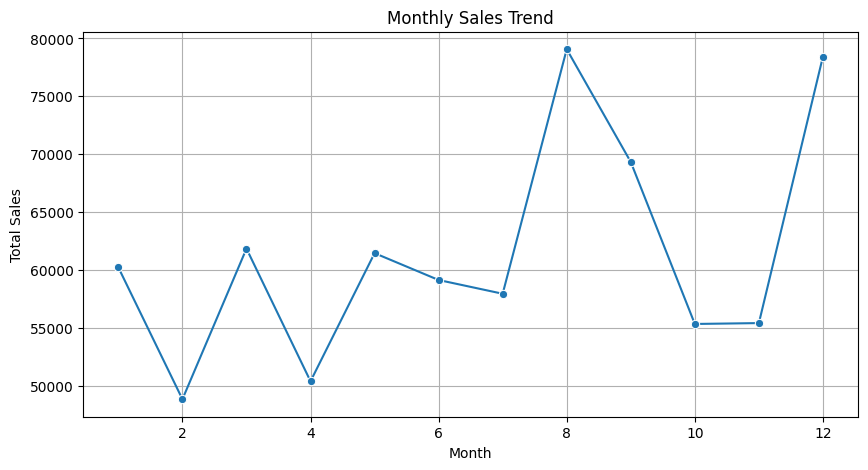

In [37]:
# Total Sales by Month (Line Chart)

df['Sales'] = df['quantity'] * df['price']

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## Interpretation of your above chart

Explain the Chart

- This chart shows the total sales for each month plotted as a line.
- The line connects monthly sales values and shows how sales increased or decreased across the months.

What is it saying?

- It is showing the sales trend over time.
- Which months had high sales
- Which months had low sales
- Whether sales are increasing, decreasing, or fluctuating
- It tells the overall growth or decline pattern across the year.

What features you used?

- Month → As the time period (x-axis)
- Sales → Total sales amount (y-axis)
- quantity × price → To calculate actual sales
- groupby('Month') → To get monthly total sales
- Line Chart → To show trend over time
- marker='o' → To highlight each month’s data point

From this what you are showing us?

- How sales change from one month to another
- The overall trend (upward / downward / seasonal)
- The best-performing and worst-performing months
- This helps understand when sales peak and when they dip, useful for planning inventory, marketing, and seasonal strategies.

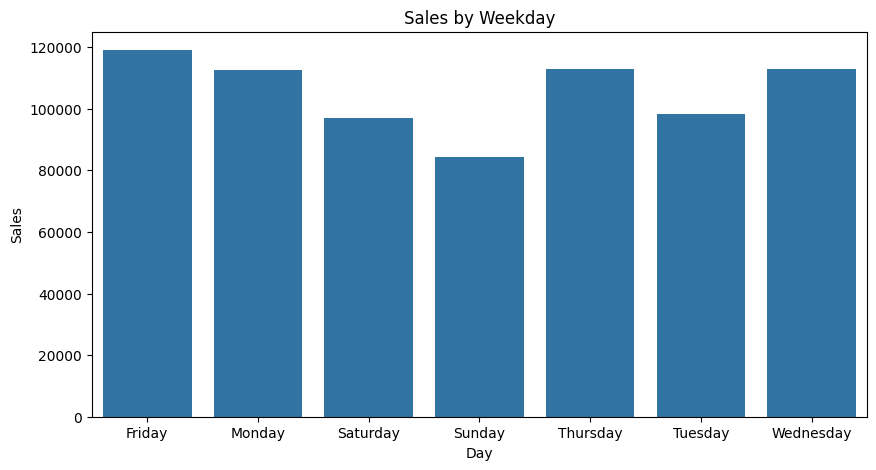

In [38]:
# Sales by Weekday (Bar Chart)

weekday_sales = df.groupby('Weekday')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=weekday_sales, x='Weekday', y='Sales')
plt.title("Sales by Weekday")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.show()

## Interpretation of your above chart

Explain the Chart

- This chart shows the total sales made on each weekday.
- Every bar represents how much sales happened on that specific day.

What is it saying?

- It shows which days have high sales and which days have low sales.
- You can easily see the best-performing day (tallest bar) and the slowest day (shortest bar).

What features you used?

- Weekday → Used as the category (x-axis)
- Sales → Total sales amount for each day (y-axis)
- Groupby() → To calculate total sales per weekday
- Bar Chart → To visually compare sales across days

From this what you are showing us?

- The sales pattern across the week
- Which day performs the best
- Which day needs improvement
- The overall weekly trend in customer activity

In [39]:
df['city'].unique()

array(['New Oliviaberg', 'Port Matthew', 'West Sarah', 'Hernandezburgh',
       'Jenkinshaven', 'East Tonyaberg', 'North Jessicabury',
       'Aliciaberg', 'West Larrymouth', 'Lake Ian', 'Elizabethmouth',
       'Melanieberg', 'Allisonland', 'Myershaven', 'South Tonya',
       'Port Allisonfort', 'Levyport', 'Fullerland', 'North Anthony',
       'North Whitneytown', 'West Cynthiaton', 'East Christopher',
       'Port Danielleview', 'East Christopherborough', 'Douglasport',
       'North Jamesside', 'North Carrie', 'Port Kenneth', 'East Kylie',
       'Mendezburgh', 'Kristenland', 'Lake Sarah', 'Fryeberg',
       'Lake Michael', 'North Mary', 'Cynthiaport', 'East Corytown',
       'Martinezview', 'North Terrancehaven', 'Lake Rhondatown',
       'Williamston', 'Lake Jeffrey', 'New Carolfort', 'Franklinmouth',
       'New Terri', 'Jeffreyview', 'Teresaville', 'Mcdonaldmouth',
       'West Geraldhaven', 'Bowmanmouth', 'Walkerland',
       'Port Patriciashire', 'Jacobburgh', 'New Brittanyto

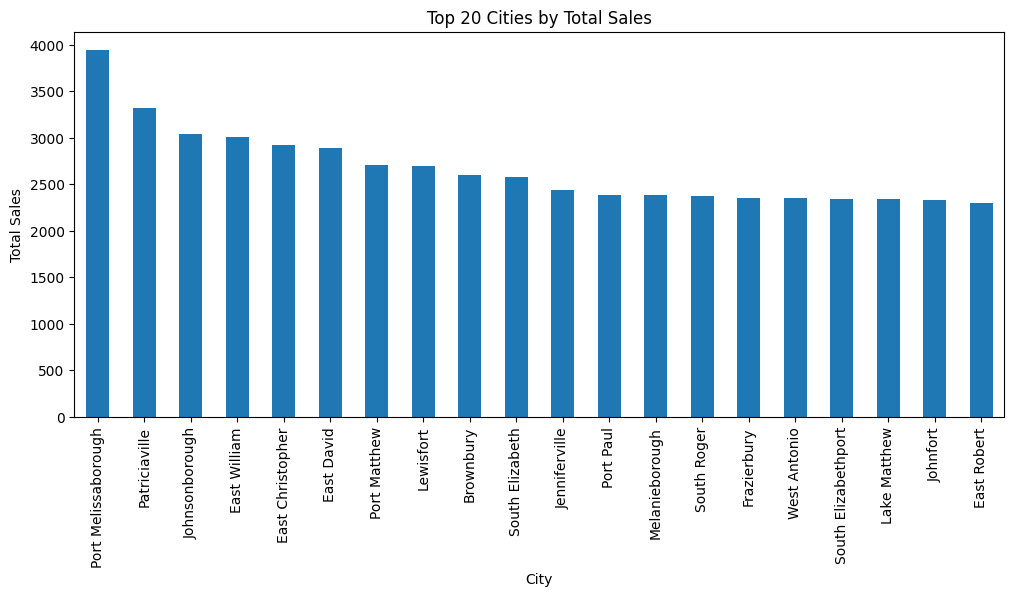

In [40]:
# Sales by Top 20 City (Bar Chart)

city_sales = df.groupby('city')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
city_sales.head(20).plot(kind='bar')
plt.title("Top 20 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

## Interpretation of your above chart

Explain the Chart

- This bar chart shows the total sales for each city.
- Only the top 20 cities with the highest total sales are displayed.
- Each bar represents a city, and its height shows how much total revenue that city generated.

What is it saying?

- Which cities are generating the most revenue
- How sales compare across different cities
- Key markets contributing most to the business

What features you used?

- city → To group orders
- Sales → Total sales per city
- groupby() + sum() → To calculate total sales
- sort_values(ascending=False) → To get the top 20 cities
- Bar chart → To visually compare total sales
- xticks rotation → To make city names readable

From this what you are showing us?

- The cities with the highest total revenue
- Potential key markets for focus
- Insights for sales strategy, marketing, and resource planning

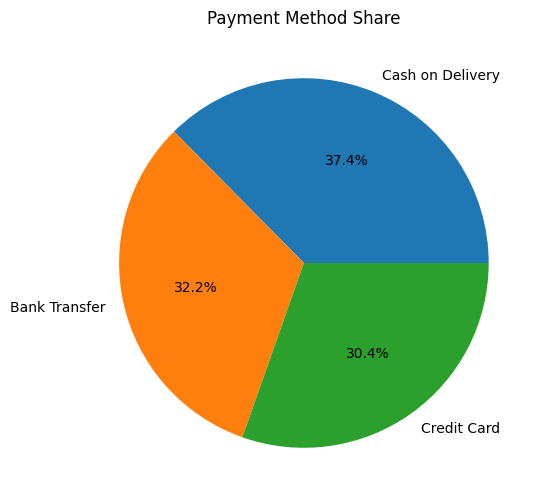

In [41]:
# Payment Method Distribution (Pie Chart)

payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(6,6))
payment_counts.plot.pie(autopct="%1.1f%%")
plt.title("Payment Method Share")
plt.ylabel("")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This pie chart shows the percentage share of each payment method used by customers.
- Each slice represents how often a particular payment method was used.

What is it saying?

- It tells us which payment method is most preferred and which ones are less frequently used.
- The bigger the slice, the more customers use that payment method.

What features you used?

- payment_method column → To identify types of payments
- value_counts() → To count how many times each method was used
- Pie chart → To represent share/percentage
- autopct → To show the percentage on the chart

From this what you are showing us?

- The distribution of payment methods
- The most popular and least popular payment types
- Customer payment preference trends
- This helps understand which payment option customers choose most often.

2. PRODUCT ANALYSIS CHARTS

(Uses: product_id, product_name, category_name)

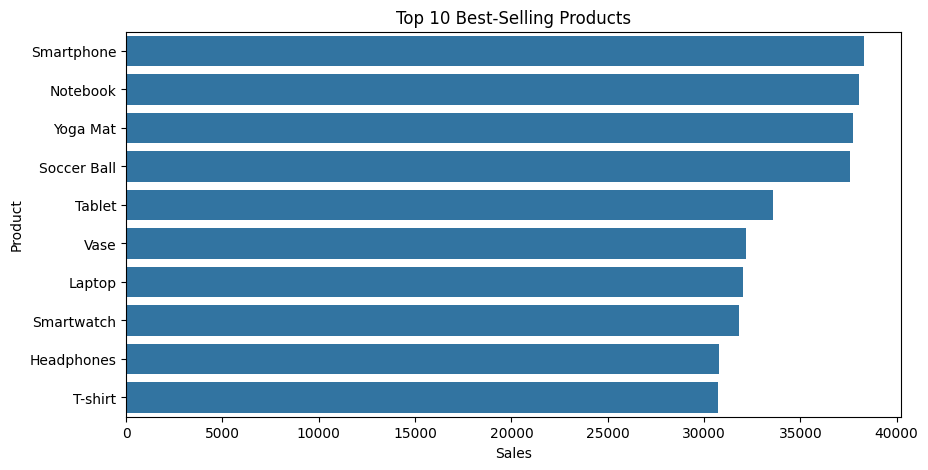

In [42]:
# Top 10 Best-selling Products (Bar Chart)

product_sales = df.groupby('product_name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=product_sales, x='Sales', y='product_name')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Sales")
plt.ylabel("Product")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows the top 10 products with the highest total sales.
- Each bar represents one product, and the length of the bar shows how much sales that product generated.

What is it saying?

- Which products are the best performers
- Which products generate the most revenue
- The ranking of the top 10 products based on total sales
- The product at the top of the chart is the number one best-selling item.

What features you used?

- product_name → To group products
- Sales → Total sales value
- groupby() + sum() → To calculate total sales per product
- nlargest(10) → To pick the top 10 highest-selling products
- Bar chart → To compare product sales visually

From this what you are showing us?

- The top 10 highest revenue-generating products
- Which products customers buy the most
- Which items contribute the most to the company’s sales
- Useful insights for inventory, marketing, and product strategy


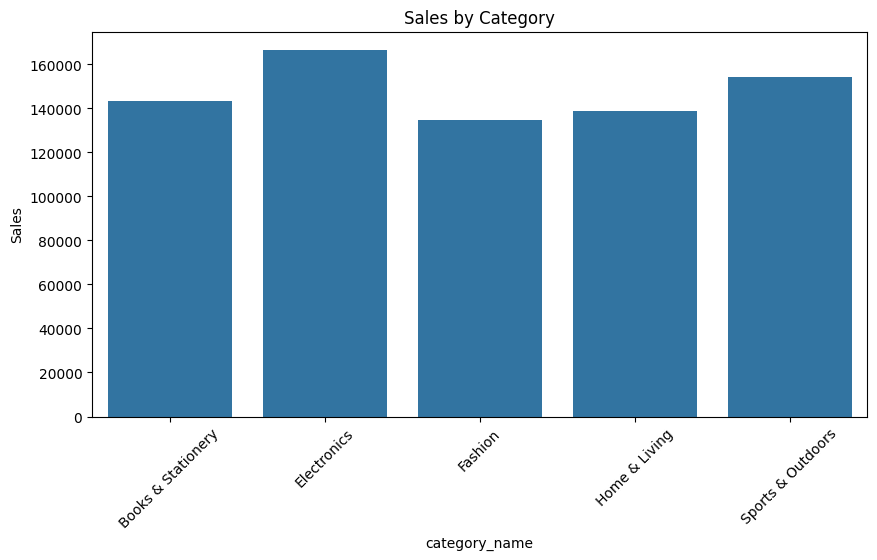

In [43]:
# Category-wise Sales Contribution (Bar Chart)

category_sales = df.groupby('category_name')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=category_sales, x='category_name', y='Sales')
plt.xticks(rotation=45)
plt.title("Sales by Category")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows the total sales for each product category.
- Each bar represents a category, and the height shows how much sales that category generated.

What is it saying?

- Which categories are top performers
- Which categories bring high or low revenue
- How sales are distributed across different product types
- The tallest bar represents the highest-selling category.

What features you used?

- category_name → To identify product categories
- Sales → Total sales amount
- groupby() + sum() → To calculate total sales per category
- Bar chart → To compare sales across categories
- xticks rotation → To make category names readable

From this what you are showing us?

- The sales performance of each category
- Which categories bring the most revenue
- Insights to help in inventory planning, marketing, and business focus

3. CUSTOMER ANALYSIS CHARTS

(Uses: customer_id, gender, age, Age_Group, city)

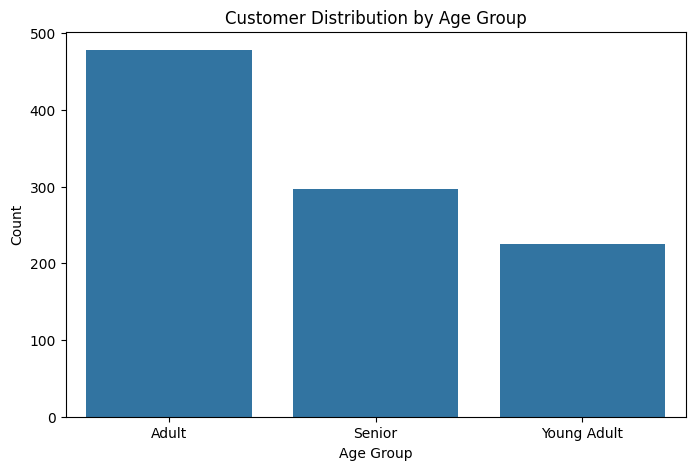

In [44]:
# Customer Count by Age Group (Bar Chart)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_Group')
plt.title("Customer Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows how many customers belong to each Age Group category.
- Each bar represents the count of customers in that age group.

What is it saying?

- Which age group has the highest number of customers
- Which age group is least represented
- The overall age distribution pattern of your customers
- This helps identify your main customer demographic.

What features you used?

- Age_Group → Categorized age ranges (e.g., 18–25, 26–35, etc.)
- Countplot → To show how many customers fall into each group
- Figure size & labels → To make the chart readable

From this what you are showing us?

- The customer count per age group
- Which age groups dominate your customer base
- Useful insights for targeted marketing and product planning

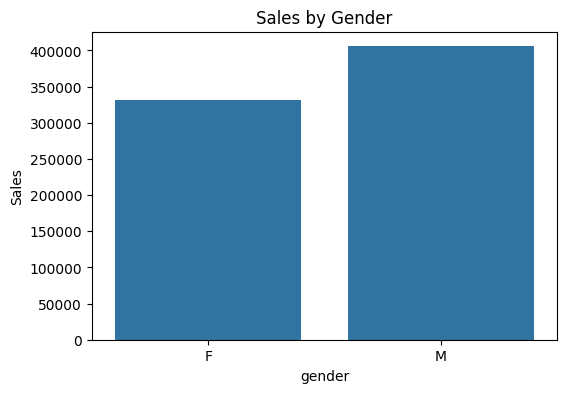

In [45]:
# Sales by Gender (Bar Chart)

gender_sales = df.groupby('gender')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=gender_sales, x='gender', y='Sales')
plt.title("Sales by Gender")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows the total sales for each gender.
- Each bar represents how much revenue was generated by male or female customers.

What is it saying?

- Which gender contributes more to total sales
- The comparison between male and female customer purchases

What features you used?

- gender → To group customers
- Sales → Total sales value
- groupby() + sum() → To calculate total sales per gender
- Bar chart → To visually compare sales

From this what you are showing us?

- Sales distribution across genders
- Which gender is the more profitable customer segment
- Helps in marketing and targeting strategies

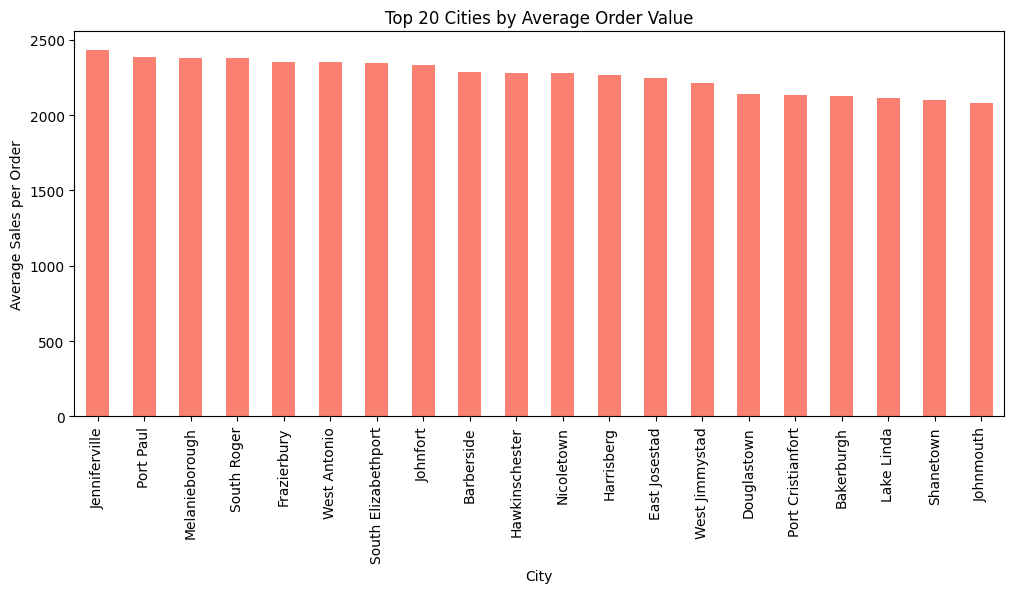

In [46]:
# Average Order Value by City (Bar Chart)
avg_sales_city = df.groupby('city')['Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
avg_sales_city.head(20).plot(kind='bar', color='salmon')
plt.title("Top 20 Cities by Average Order Value")
plt.xlabel("City")
plt.ylabel("Average Sales per Order")
plt.xticks(rotation=90)
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows the average sales per order for each city.
- Only the top 20 cities with the highest average order value are displayed.
- Each bar represents a city, and the height shows its average sales per order.

What is it saying?

- Which cities have the highest spending per order
- How average order value varies across different cities
- Where customers are spending more on average

What features you used?

- city → To group orders
- Sales → Total sales per order
- groupby() + mean() → To calculate average order value per city
- sort_values(ascending=False) → To get the highest spending cities first
- Bar chart → To visually compare average sales
- xticks rotation → To make city names readable

From this what you are showing us?

- Cities with the highest average order value
- Potential target markets for premium products
- Insights for marketing, promotions, and resource allocation

4. REVIEW & RATING ANALYSIS

(Uses: review_score, Rating_Category)

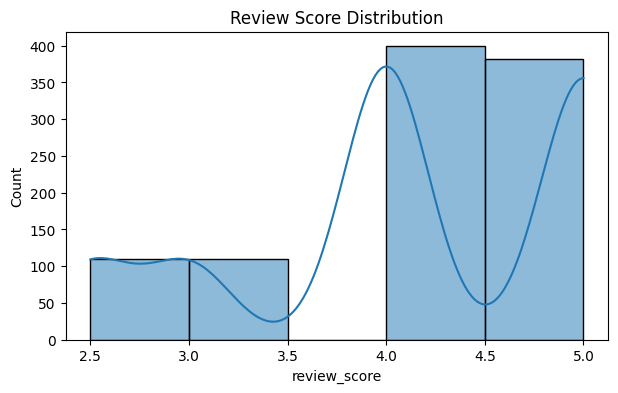

In [47]:
# Review Score Distribution (Histogram)

plt.figure(figsize=(7,4))
sns.histplot(df['review_score'], bins=5, kde=True)
plt.title("Review Score Distribution")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This histogram shows how customer review scores are distributed.
- The x-axis shows review scores (e.g., 1–5), and the y-axis shows how many reviews fall into each score.
- The KDE curve smooths the distribution to show the overall trend.

What is it saying?

- Which review scores are most common
- Whether customers generally give high or low ratings
- The overall pattern of customer satisfaction

What features you used?

- review_score → Customer ratings
- Histogram → To show frequency distribution
- bins=5 → To group scores into 5 ranges (1,2,3,4,5)
- kde=True → To add a smooth density curve

From this what you are showing us?

- How customers rate products overall
- Whether the ratings are skewed toward high or low scores
- Useful insights for product improvement and customer satisfaction analysis

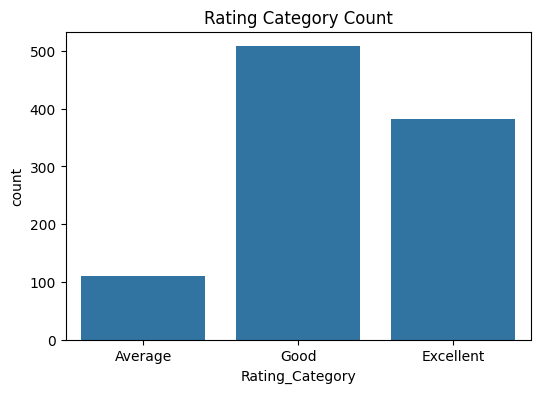

In [48]:
# Rating Category vs Count (Bar Chart)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Rating_Category')
plt.title("Rating Category Count")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows the number of reviews in each rating category (e.g., Good, Bad, Excellent).
- Each bar represents how many reviews fall into that category.

What is it saying?

- Which rating category is most common
- Which category is least common
- The overall customer satisfaction distribution

What features you used?

- Rating_Category → Categorized review scores
- Countplot → To show the frequency of each category
- Figure size & labels → To make the chart readable

From this what you are showing us?

- The distribution of review categories
- Which rating (Good, Bad, Excellent) is dominant
- Insights for product quality perception and improvement

5. TIME-BASED ANALYSIS

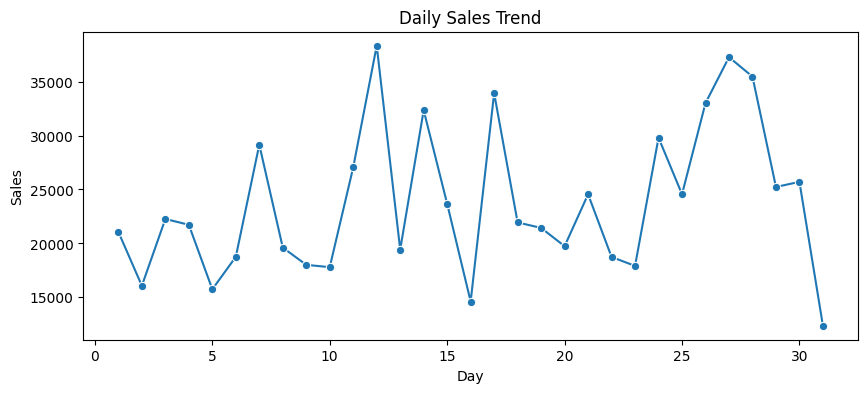

In [49]:
# Daily Sales Trend (Line Chart)

daily_sales = df.groupby('Day')['Sales'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=daily_sales, x='Day', y='Sales', marker='o')
plt.title("Daily Sales Trend")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This line chart shows the total sales for each day.
- Each point represents total sales for that day, and the line shows the trend across days.

What is it saying?

- How sales change day by day
- Which days have high sales and which have low sales
- The overall daily sales pattern or trend

What features you used?

- Day → Day of the week or specific date (x-axis)
- Sales → Total sales per day (y-axis)
- groupby() + sum() → To calculate total daily sales
- Line chart with marker → To show trend and highlight daily values

From this what you are showing us?

- The day-to-day variation in sales
- Days with peak or low sales
- Useful insights for daily planning, staffing, and promotions

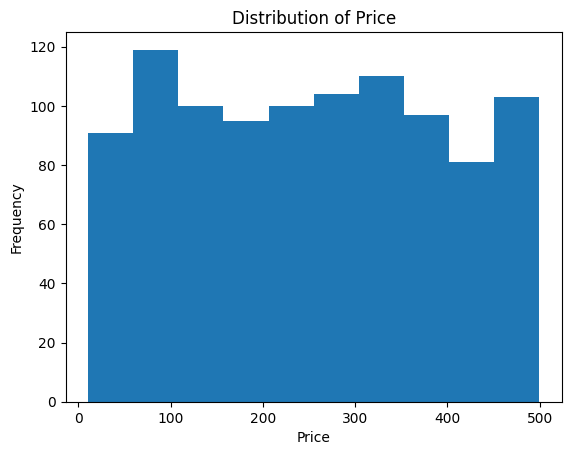

In [50]:
# Histogram — Price Distribution
plt.hist(df['price'])
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This histogram shows how product prices are distributed in your dataset.
- The x-axis represents price ranges, and the y-axis shows how many products fall into each range.

What is it saying?

- Which price ranges are most common
- Whether products are mostly low-priced, mid-priced, or high-priced
- The overall pricing pattern in your dataset

What features you used?

- price → Product price values
- Histogram → To show frequency distribution
- xlabel & ylabel → To label axes
- title → To describe the chart

From this what you are showing us?

- How product prices are spread
- The most frequent price ranges
- Insights for pricing strategy and product positioning

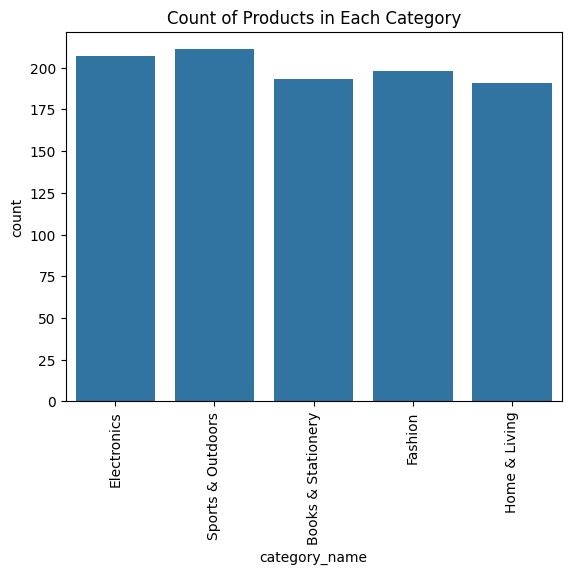

In [51]:
# Countplot — Category Distribution
sns.countplot(x='category_name', data=df)
plt.xticks(rotation=90)
plt.title("Count of Products in Each Category")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This bar chart shows the number of products in each category.
- Each bar represents a category, and its height shows how many products belong to that category.

What is it saying?

- Which categories have more products available
- Which categories have fewer products
- The overall product distribution across categories

What features you used?

- category_name → To group products by category
- Countplot → To show the frequency of products in each category
- xticks rotation → To make category names readable

From this what you are showing us?

- The distribution of products across categories
- Insights into inventory focus and category diversity

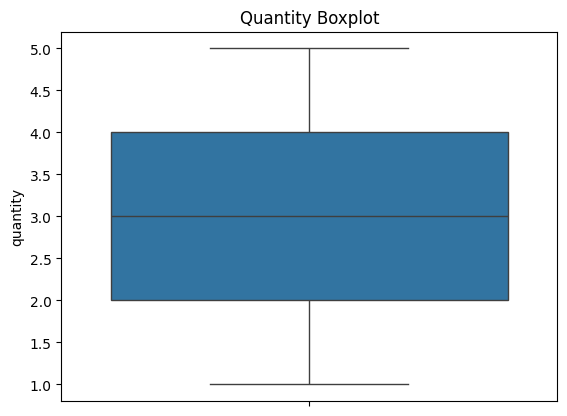

In [52]:
# Boxplot — Quantity Outliers
sns.boxplot(y=df['quantity'])
plt.title("Quantity Boxplot")
plt.show()

## Interpretation of your above chart
Explain the Chart

- This boxplot shows the distribution of the quantity of products in orders.
- It visualizes the median, quartiles, and possible outliers in the data.

What is it saying?

- The typical range of quantity ordered (interquartile range)
- The median quantity
- Any outliers (orders with unusually high or low quantities)

What features you used?

- quantity → Number of items in each order
- Boxplot → To show distribution, median, quartiles, and outliers

From this what you are showing us?

- How quantities vary across orders
- The usual order size
- Potential unusual large or small orders that may need attention

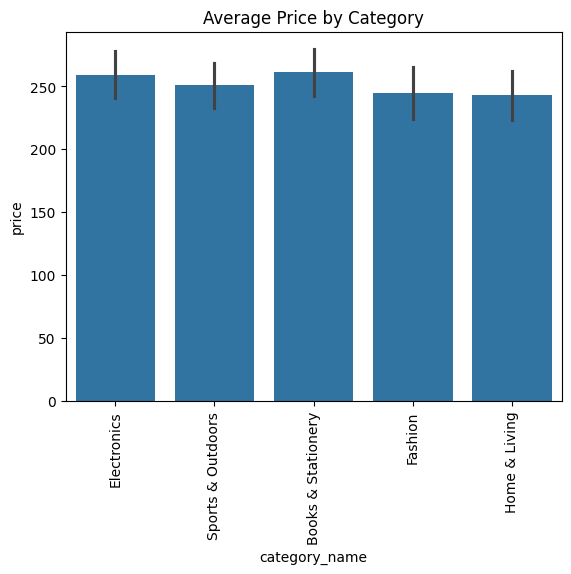

In [53]:
## BIVARIATE ANALYSIS (Two variables)

# Barplot — Category vs Average Price
sns.barplot(x='category_name', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Average Price by Category")
plt.show()

## Interpretation of your above chart

Explain the Chart

- This bar chart shows the average product price in each category.
- Each bar represents a category, and its height shows the average price of products in that category.

What is it saying?
- Which categories have higher-priced products
- Which categories have lower-priced products
- The pricing trend across different categories

What features you used?

- category_name → To group products by category
- price → Product prices
- Barplot → To show average price per category

From this what you are showing us?

- Average pricing per category
- Insights for pricing strategy and category comparison
- Which categories may be premium vs budget-focused

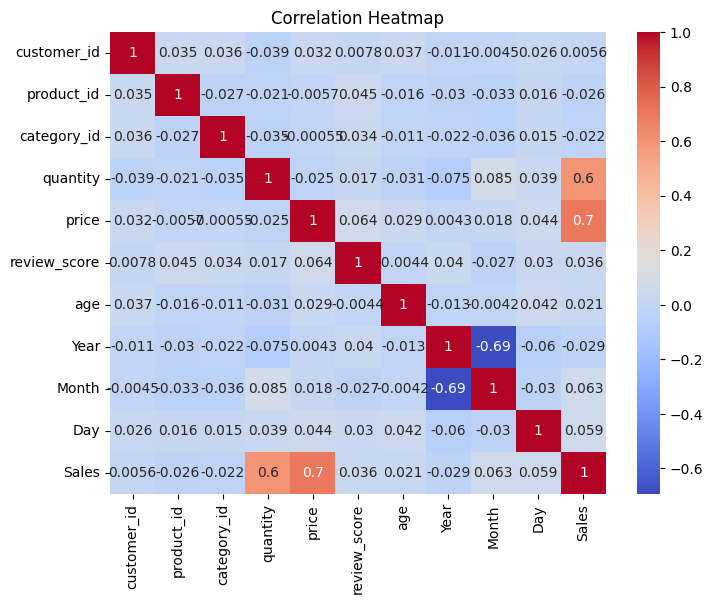

In [54]:
# Heatmap — Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Interpretation of your above chart

Explain the Chart

- This heatmap shows the correlation between all numerical columns in your dataset.
- Each cell represents how strongly two variables are related (positively or negatively).
- Positive correlation (closer to +1) → When one increases, the other also increases.
- Negative correlation (closer to –1) → When one increases, the other decreases.
- Values near 0 → Very weak or no relationship.
- The color scale (cool to warm) makes it easy to see high and low correlations.

What is it saying?

- Which features are strongly related
- Which variables affect or move with each other
- Whether features have patterns or dependencies
- For example, Sales may show a strong correlation with quantity or price.

What features you used?

- df.corr(numeric_only=True) → Calculates correlation between numeric columns
- Heatmap → To visualize correlation values
- annot=True → Shows the numbers inside the cells
- cmap="coolwarm" → Color gradient for correlation strength

From this what you are showing us?

- The relationship strength between all numerical variables
- Which features are important or dependent
- Useful insights for feature selection, modeling, and understanding data behavior

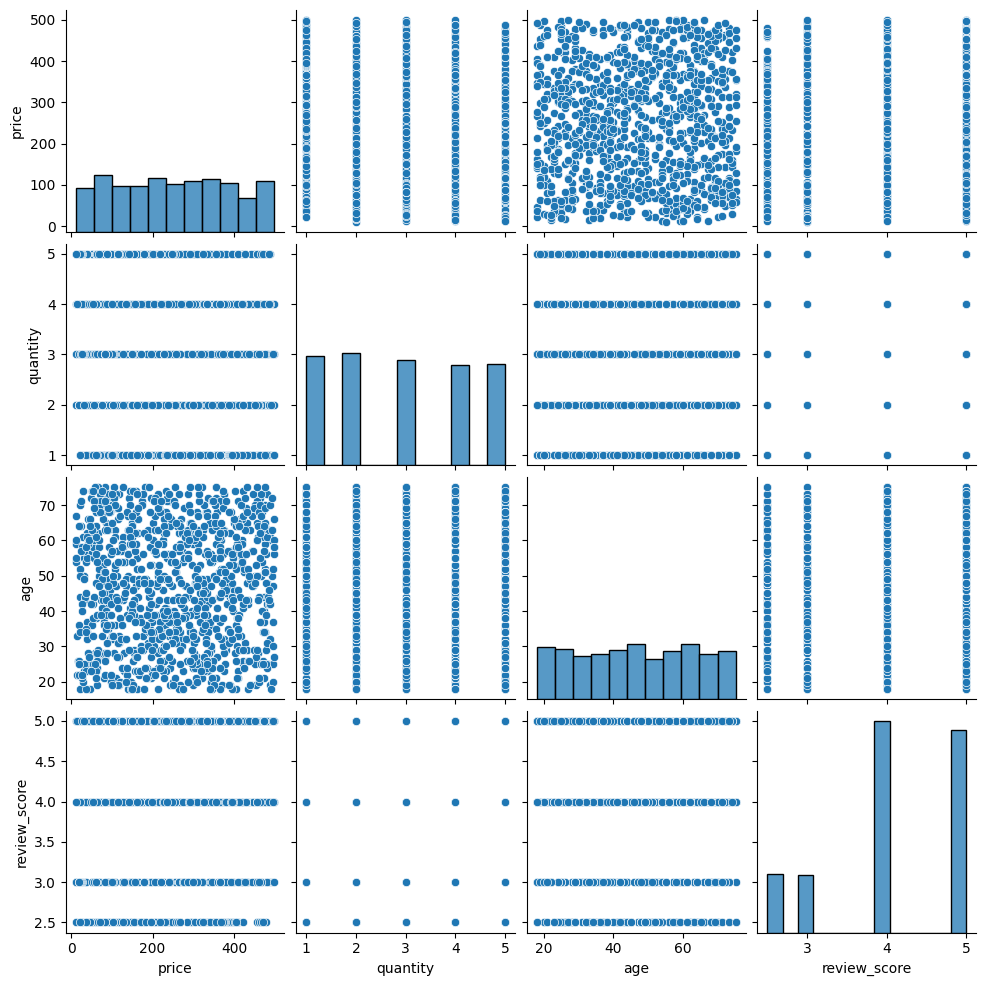

In [55]:
## MULTIVARIATE ANALYSIS

# Pairplot (multi-variable relationship)
sns.pairplot(df[['price', 'quantity', 'age', 'review_score']])
plt.show()

## Interpretation of your above chart

Explain the Chart

- This pairplot shows the relationship between multiple numerical variables: price, quantity, age, and review_score.
- It creates scatter plots for every pair of variables and histograms on the diagonal.

What is it saying?

- How two variables relate to each other (e.g., price vs quantity)
- Whether there are patterns, trends, or clusters
- The distribution of each variable
- Possible correlations or unusual values
- This gives a full picture of how the variables behave together.

What features you used?

- price, quantity, age, review_score → Numerical columns selected
- pairplot() → Automatically creates scatter plots + histograms
- Matplotlib/Seaborn → For visualization

From this what you are showing us?

- The overall relationship between key numeric features
- How each variable impacts or relates to the others
- Insights for data patterns, trends, and model preparation

In [56]:
# Pivot Table — Category vs Gender vs Avg Price
pivot_table = df.pivot_table(values='price', index='category_name', columns='gender', aggfunc='mean')
pivot_table

gender,F,M
category_name,,
Books & Stationery,270.734342,254.794530
Electronics,265.431158,253.631339
Fashion,247.712475,241.336186
Home & Living,244.086786,242.460561
Sports & Outdoors,247.525357,253.338189


## Interpretation of your above chart

Explain the Pivot Table

- This pivot table shows the average product price for each category, split by gender.
- Rows = category_name
- Columns = gender (Male/Female)
- Values = average price
- It helps compare how pricing differs for each gender within each category.

What is it saying?

- Which categories have higher average prices
- How male vs female customers differ in average product price
- Categories where one gender spends more than the other

What features you used?

- pivot_table() → To summarize data
- values='price' → The measure used
- index='category_name' → Rows
- columns='gender' → Columns
- aggfunc='mean' → To calculate average

From this what you are showing us?

- Average price comparison between genders for each category
- Insights for targeted pricing, marketing, and product strategy
- Understanding which categories have gender-based price differences

## Stage 4 – Documentation, Insights and Presentation

Show a dashboard aligning all the charts in powerbi by connecting python in PowerBI

Summarize findings in plain English (what do the patterns mean)

Highlight 3–5 key insights (trends, anomalies, correlations)

Provide recommendations for business or decision-making

Explain the FINAL STORY WITH THE DASHBOARD

Create a PDF pasting your DASHBOARD, explaining all the above mentioned concepts and submit it


In [ ]:
# your stage 4 pdf Link
https://drive.google.com/file/d/1cgeSOwhQ87zkyLMHP4Xsu9hs23sct1KX/view?usp=sharing

# Future Enhancement
1. Advanced Predictive Analytics

- Forecast customer churn
- Predict future revenue trends
- Fraud probability detection

2. Automated Alerts & Notifications

- Alerts for sudden revenue drops
- Notifications for high churn–risk customers
- Seasonal or weekend performance alerts

3. Drill-Through & Deep-Dive Analysis

- Country-wise revenue breakdown
- Monthly, weekly, and seasonal trend insights

4. AI-Powered Insights

- Automatic trend explanations
- AI-driven business suggestions

5. Customer & Product Segmentation

- Age-based customer groups
- Risk-based customer clusters
- Geography-based clusters

6. Recommendation Systems

- Best product/category to promote
- Regions needing fraud monitoring
- Months requiring stronger marketing push

# Conclusion

- This analysis provides a comprehensive understanding of customer behavior, product performance, and overall business trends. The dashboards highlight key patterns in sales, ratings, demographics, and product categories, enabling data-driven decision-making. Insights such as top-performing products, monthly sales fluctuations, customer distribution, and rating trends help identify growth opportunities and areas that need improvement.

- By transforming raw data into meaningful visual insights, the project supports better strategic planning in marketing, inventory management, customer engagement, and product development. With the recommended future enhancements—such as predictive analytics, segmentation, and AI-based insights—the analysis can evolve into a more advanced decision-support system.

- Overall, this project demonstrates the value of data analytics in understanding business performance and driving actionable outcomes.